<a href="https://colab.research.google.com/github/pravina5/Pravina-Bhalerao-Grip-TSF/blob/main/Grip_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Pravina Bhalerao

The Spark Foundation

Data Science and Business Analytics Task#1

Predict the Percentage of a Student based on no of hrs of study using Simple Linear Regression with 2 variables.

Question : What will be the predicted score if the student studies for 9.25 hrs/day 

# **1.Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. Importing Dataset**

The dataset has two features :No of hours a student studies and the scores obtained.

In [ ]:
# Reading data from link
data = pd.read_csv("http://bit.ly/w-data")

In [ ]:
# displays the first 10 rows of the dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **3.Understanding Data**

In [ ]:
# Shape of our dataset
data.shape

(25, 2)

In [ ]:
''' Info our dataset. Use to see if there are any null values. If yes the we need to manipulate the data by deleting rows
 if there are enough example or replace with mean/median/mode '''

data.info()
# as all the values are NON-Null there is no need to perform any manipulation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Describe our dataset. It is used to check if there is any sudden jump 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **4.Let's visualize the dataset and see the relation between the data**

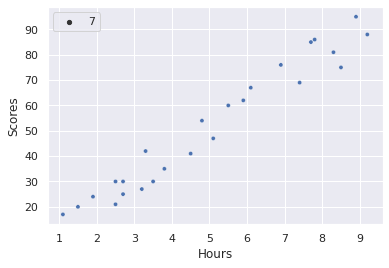

In [ ]:
sns.set(color_codes=True)
x= data["Hours"]
y= data["Scores"]
sns.scatterplot(x=x,y=y, data = data,palette = 'dark',size= 7)
plt.show()


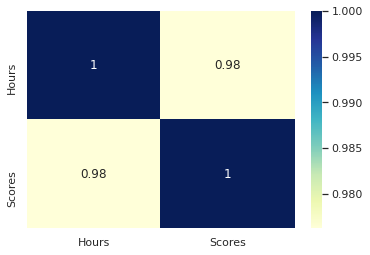

In [ ]:
# Visualizing the data using heatmap. It is visible from this Hours and Scores are correlated to each other. 

sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# **5. Performing Linear Regression**

Equation of simple linear regression

y = c + mX

In our case:

Scores = c + m * Hours

The m values are known as model coefficients or model parameters.

# **5.a Create X and y**

In [ ]:
X = data['Hours'] #Independant variable
y= data['Scores'] #Target variable

# **5.b Create Train and Test Set**

We need to split our variables into **training and testing sets**. Using the **training set**, we’ll **build the model** and perform the model on the testing set. We’ll divide the training and testing sets into a **8:2 ratio**, respectively as this is the most common ratio.

In [ ]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 100)

In [ ]:
# Training set after spilting 
X_train #hours


19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
1     5.1
20    2.7
14    1.1
17    1.9
18    6.1
2     3.2
10    7.7
16    2.5
15    8.9
7     5.5
3     8.5
8     8.3
Name: Hours, dtype: float64

In [ ]:
print(X_train.shape)
print(X_test.shape)

(20,)
(5,)


In [ ]:
y_train #Scores 

19    69
23    76
21    54
6     88
12    41
4     30
24    86
0     21
1     47
20    30
14    17
17    24
18    67
2     27
10    85
16    30
15    95
7     60
3     75
8     81
Name: Scores, dtype: int64

In [ ]:
# Shape of the train set without adding column
X_train.shape #(20,)

# Adding additional column to the train and test data
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


# **5.c Now, let’s fit the line to the plot importing the LinearRegression library from the sklearn.linear_model.**

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 1.989423110974684
Slope : [9.83544438]


**Equation of Line:**

y=9.84X+1.99

Scores = 9.84*Hours+1.99 

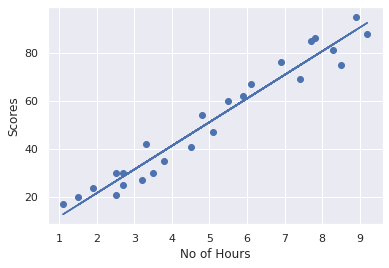

In [ ]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('No of Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
lm.score(X_train,y_train) #shows accuracy of the model

0.9519568836485192

# Evaluating Regression Model Using R² value

In [ ]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Comparing the r2 value of both train and test data
print("R² value of train set data:",r2_score(y_train,y_train_pred))
print("R² value of train set data:",r2_score(y_test,y_test_pred))

R² value of train set data: 0.9519568836485192
R² value of train set data: 0.9050356232459791


# **The R² value on test data is within 5% of the R² value on training data. We can apply the model to the unseen test set in the future.**

# Evaluating Regression Model using Mean Absolute Error

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.140342096254413


In [ ]:
print('No of hours (Test data)')
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

No of hours (Test data)
[[2.7]
 [3.8]
 [3.3]
 [5.9]
 [1.5]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


# **Making Own Prediction:**

In [ ]:
hours =9.25
own_pred =lm.predict(np.array([[9.25]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.96728365185982


# **The predicted score if the student studies for 9.25 hrs/day is 92.96**

**References:**

https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

https://drive.google.com/file/d/1koGHPElsHuXo9HPL4BQkZWRMJkOEHiv4/view?usp=sharing